In [2]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# split at x=0

61
6


/Users/ektapatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


(1e-06, 10000.0)

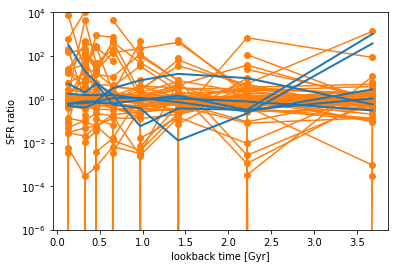

In [25]:
plt.figure()

ids0 = np.loadtxt('M31analogs_noMM8Gyr_mstar.txt') #61                                                                                                   
print(len(ids0))   
for id in ids0:
    id = int(id)
    data = np.loadtxt('%s_SFR_time_avg_norecentMM_x0split.txt'%id)
    ratio = data[:,1]/data[:,2]
    times = list(data[:,0])
    plt.plot(times,ratio, 'o-',color='C1')

ids = np.loadtxt('M31analogs_MM1_4Gyr_mstar.txt')
print(len(ids))

for id in ids:
    id = int(id)
    data = np.loadtxt('%s_SFR_time_avg_recentMM_x0split.txt'%id)
    ratio = data[:,1]/data[:,2]
    times = list(data[:,0])
    plt.plot(times,ratio,color='C0', lw=2)

plt.yscale("log")  
#plt.legend()
plt.xlabel('lookback time [Gyr]')
plt.ylabel('SFR ratio')
plt.ylim(1e-6, 1e4)

# figure out converting x-axis to age?